<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Project/AdMiPeQa/Project_big_data_AdMiPeQa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Flight Analysis <a href="https://colab.research.google.com/drive/1AbXa171YIE-AINYH1U1sw7-zNH32AJFd?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project aims to investigate the Air Flight in 2022. The dataset consists of 61 columns and 4078318 rows. It is considered as big data and occupies 1.42GB of memory. The dataset is obtained from Kaggle which contains many kinds of dataset ranging from agriculture to education. We have selected this dataset because we like to analyze the flight status. We will perform a series of steps like data processing, data cleaning and visualization on this dataset. Google Colab will be used in this project. Other than that, there will be three libraries related to big data processing which are Pandas, Dask and Koalas being used in this project. At the end, we will compare the processing results from these libraries.  <br><br>
**Group Members:**

<table>
  <tr>
    <th>Name</th>
    <th>Matric</th>
  </tr>
  <tr>
    <th>ADAM WAFII BIN AZUAR</th>
    <th>A20EC0003</th>
  </tr>
  <tr>
    <th>HONG PEI GEOK</th>
    <th>A20EC0044</th>
  </tr>
    <tr>
    <th>MIKHEL ADAM BIN MUHAMMAD EZRIN</th>
    <th>A20EC0237</th>
  </tr>
    <tr>
    <th>QAISARA BINTI ROHZAN</th>
    <th>A20EC0133</th>
  </tr>
</table>

## Downloading the Dataset

*   This dataset contains all flight information including cancellation and delays by airline.
*   There are 4078318 samples and 61 feature variables in this dataset.
*   The size of dataset is 1.42GB.


#### Attribute Information:
| Acronym | Description |
| --- | --- |
| **FlightDate** |  Flight Date (yyyymmdd) |
| **Airline** |  Name of Airline |
| **Origin** |  Origin Airport |
| **Dest** |  Destination Airport |
| **Cancelled** | Cancelled Flight Indicator (1=Yes) |
| **Diverted** |  Diverted Flight Indicator (1=Yes) |
| **CRSDepTime** |  CRS Departure Time (local time: hhmm) |
| **DepTime** |  Actual Departure Time (local time: hhmm) |
| **DepDelayMinutes** |  Difference in minutes between scheduled and actual departure time. Early departures set to 0. |
| **DepDelay** |  Difference in minutes between scheduled and actual departure time. Early departures show negative numbers. |
| **ArrTime** | Actual Arrival Time (local time: hhmm)  |
| **ArrDelayMinutes** |  Difference in minutes between scheduled and actual arrival time. Early arrivals set to 0. |
| **AirTime** |  Flight Time, in Minutes |
| **CRSElapsedTime** |  CRS Elapsed Time of Flight, in Minutes |
| **ActualElapsedTime** |  Elapsed Time of Flight, in Minutes |
| **Distance** | Distance between airports (miles) |
| **Year** |  Year |
| **Quarter** |  Quarter (1-4) |
| **Month** |  Month |
| **DayofMonth** |  Day of Month |
| **DayOfWeek** |  Day of Week |

**Step 1** <br>
Let's begin by downloading the data, and listing the files within the dataset.<br>
The data can be downloaded from [Kaggle](https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022?select=Combined_Flights_2022.csv) The dataset is in zip file format and there is only one csv file inside this dataset. 

The dataset has been downloaded and extracted.

**Step 2**<br>
The dataset has been uploaded to google drive and it can be viewed or downloaded through this link [Dataset](https://drive.google.com/file/d/1lveRi1YwJmDMGw6zzsBFNLXeLhMBr7dj/view?usp=share_link)

**Step 3**<br>
In order to use the dataset, we create the link and pull the dataset from google drive.

In [ ]:
# Pull dataset from google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1lveRi1YwJmDMGw6zzsBFNLXeLhMBr7dj/view?usp=sharing'
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Combined_Flights_2022.csv') 

## Data Preparation and Cleaning

Data preparation is the important process to clean and transform the data. This step can help to remove missing data, outlier and duplicate value in order to produce quality data analysis results. It is also one of the important steps in handling big data before proceeding to analysis. 



**Install & Import Library**

**1. Pandas**

In [ ]:
import pandas as pd
import numpy as np

**2. Dask**

In [ ]:
!pip install dask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import dask.dataframe as dd

**3. Koalas**

In [ ]:
!pip install koalas
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import databricks.koalas as ks

**Import Data**<br>

**1. Pandas**

In [ ]:
%%time
df = pd.read_csv('Combined_Flights_2022.csv')
df.head()

CPU times: user 40.3 s, sys: 5.37 s, total: 45.7 s
Wall time: 52.7 s


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,...,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,...,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,...,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,...,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,...,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0


**2. Dask**

In [ ]:
%%time
dd_df = dd.read_csv('Combined_Flights_2022.csv')
dd_df.head(5)

CPU times: user 1.74 s, sys: 255 ms, total: 2 s
Wall time: 2.1 s


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,...,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,...,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,...,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,...,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,...,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0


**3. Koalas**

In [ ]:
%%time
k_df = ks.read_csv('Combined_Flights_2022.csv')
k_df.head(5)

CPU times: user 1 s, sys: 227 ms, total: 1.23 s
Wall time: 1min 48s


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,1228.0,0.0,40.0,72.0,65.0,212.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4301,C5,20445,C5,N21144,4301,11921,1192102,31921,"Grand Junction, CO",CO,8,Colorado,82,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,0.0,-1.0,1100-1159,17.0,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,848.0,0.0,55.0,77.0,80.0,295.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4299,C5,20445,C5,N16170,4299,12206,1220605,32206,"Harlingen/San Benito, TX",TX,48,Texas,74,12266,1226603,31453,"Houston, TX",TX,48,Texas,74,0.0,-1.0,0700-0759,16.0,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,1636.0,0.0,47.0,70.0,82.0,251.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4298,C5,20445,C5,N21144,4298,11413,1141307,30285,"Durango, CO",CO,8,Colorado,82,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,0.0,-1.0,1500-1559,21.0,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,1547.0,0.0,57.0,90.0,77.0,376.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4296,C5,20445,C5,N11184,4296,12266,1226603,31453,"Houston, TX",TX,48,Texas,74,11973,1197302,31973,"Gulfport/Biloxi, MS",MS,28,Mississippi,53,0.0,-1.0,1400-1459,16.0,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,1251.0,6.0,49.0,70.0,76.0,251.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4295,C5,20445,C5,N17146,4295,11413,1141307,30285,"Durango, CO",CO,8,Colorado,82,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,0.0,0.0,1100-1159,19.0,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0


**Remove unwanted columns**<br>
Since not all the columns will be used, we will remove unwanted columns in order to save memory usage. 

**1. Pandas**

In [ ]:
df.info(verbose=False, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078318 entries, 0 to 4078317
Columns: 61 entries, FlightDate to DivAirportLandings
dtypes: bool(2), float64(18), int64(23), object(18)
memory usage: 5.6 GB


In [ ]:
%%time
df.drop(df.columns[21:], inplace=True, axis=1)
df.shape

CPU times: user 279 ms, sys: 330 ms, total: 609 ms
Wall time: 613 ms


(4078318, 21)

In [ ]:
df.info(verbose=False, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078318 entries, 0 to 4078317
Columns: 21 entries, FlightDate to DayOfWeek
dtypes: bool(2), float64(9), int64(6), object(4)
memory usage: 1.5 GB


**2. Dask**

In [ ]:
%%time
dd_df = dd_df.drop(dd_df.columns[21:], axis=1)
print('(',len(dd_df),',',len(dd_df.columns),')')

( 4078318 , 21 )
CPU times: user 50.6 s, sys: 1.66 s, total: 52.2 s
Wall time: 33.3 s


**3. Koalas**

In [ ]:
%%time
k_df = k_df.drop(k_df.columns[21:], axis=1)
k_df.shape

CPU times: user 79.3 ms, sys: 5.23 ms, total: 84.5 ms
Wall time: 4.88 s


(4078318, 21)

**Remove Null Values**<br>
Null values will affect the performance and accuracy of data analytic results. So, it will be filled with 0.

**1. Pandas**

In [ ]:
df.isnull().sum()

FlightDate                0
Airline                   0
Origin                    0
Dest                      0
Cancelled                 0
Diverted                  0
CRSDepTime                0
DepTime              120433
DepDelayMinutes      120495
DepDelay             120495
ArrTime              124239
ArrDelayMinutes      133402
AirTime              133402
CRSElapsedTime            0
ActualElapsedTime    133402
Distance                  0
Year                      0
Quarter                   0
Month                     0
DayofMonth                0
DayOfWeek                 0
dtype: int64

In [ ]:
%%time
df.fillna(0, inplace=True)

CPU times: user 900 ms, sys: 7.69 ms, total: 908 ms
Wall time: 909 ms


In [ ]:
df.isnull().sum()

FlightDate           0
Airline              0
Origin               0
Dest                 0
Cancelled            0
Diverted             0
CRSDepTime           0
DepTime              0
DepDelayMinutes      0
DepDelay             0
ArrTime              0
ArrDelayMinutes      0
AirTime              0
CRSElapsedTime       0
ActualElapsedTime    0
Distance             0
Year                 0
Quarter              0
Month                0
DayofMonth           0
DayOfWeek            0
dtype: int64

**2. Dask**

In [ ]:
dd_df.isnull().sum().compute()

FlightDate                0
Airline                   0
Origin                    0
Dest                      0
Cancelled                 0
Diverted                  0
CRSDepTime                0
DepTime              120433
DepDelayMinutes      120495
DepDelay             120495
ArrTime              124239
ArrDelayMinutes      133402
AirTime              133402
CRSElapsedTime            0
ActualElapsedTime    133402
Distance                  0
Year                      0
Quarter                   0
Month                     0
DayofMonth                0
DayOfWeek                 0
dtype: int64

In [ ]:
%%time
dd_df = dd_df.fillna(0)

CPU times: user 9.84 ms, sys: 0 ns, total: 9.84 ms
Wall time: 16.7 ms


In [ ]:
dd_df.isnull().sum().compute()

FlightDate           0
Airline              0
Origin               0
Dest                 0
Cancelled            0
Diverted             0
CRSDepTime           0
DepTime              0
DepDelayMinutes      0
DepDelay             0
ArrTime              0
ArrDelayMinutes      0
AirTime              0
CRSElapsedTime       0
ActualElapsedTime    0
Distance             0
Year                 0
Quarter              0
Month                0
DayofMonth           0
DayOfWeek            0
dtype: int64

**3. Koalas**

In [ ]:
k_df.isnull().sum()

FlightDate                0
Airline                   0
Origin                    0
Dest                      0
Cancelled                 0
Diverted                  0
CRSDepTime                0
DepTime              120433
DepDelayMinutes      120495
DepDelay             120495
ArrTime              124239
ArrDelayMinutes      133402
AirTime              133402
CRSElapsedTime            0
ActualElapsedTime    133402
Distance                  0
Year                      0
Quarter                   0
Month                     0
DayofMonth                0
DayOfWeek                 0
dtype: int64

In [ ]:
%%time
k_df[['DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'ActualElapsedTime']] = k_df[['DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'ActualElapsedTime']].fillna(0)

CPU times: user 66.2 ms, sys: 9.69 ms, total: 75.9 ms
Wall time: 352 ms


In [ ]:
k_df.isnull().sum()

FlightDate           0
Airline              0
Origin               0
Dest                 0
Cancelled            0
Diverted             0
CRSDepTime           0
DepTime              0
DepDelayMinutes      0
DepDelay             0
ArrTime              0
ArrDelayMinutes      0
AirTime              0
CRSElapsedTime       0
ActualElapsedTime    0
Distance             0
Year                 0
Quarter              0
Month                0
DayofMonth           0
DayOfWeek            0
dtype: int64

**Use efficient data types**<br>
The default data types do not use the memory effectively. We will change the data types to optimize memory usage. 

**1. Pandas**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078318 entries, 0 to 4078317
Data columns (total 21 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FlightDate         object 
 1   Airline            object 
 2   Origin             object 
 3   Dest               object 
 4   Cancelled          bool   
 5   Diverted           bool   
 6   CRSDepTime         int64  
 7   DepTime            float64
 8   DepDelayMinutes    float64
 9   DepDelay           float64
 10  ArrTime            float64
 11  ArrDelayMinutes    float64
 12  AirTime            float64
 13  CRSElapsedTime     float64
 14  ActualElapsedTime  float64
 15  Distance           float64
 16  Year               int64  
 17  Quarter            int64  
 18  Month              int64  
 19  DayofMonth         int64  
 20  DayOfWeek          int64  
dtypes: bool(2), float64(9), int64(6), object(4)
memory usage: 599.0+ MB


In [ ]:
start_mem = df.memory_usage().sum() / 1024**3

In [ ]:
%%time
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

for col in ['Airline', 'Origin', 'Dest']:
  df[col] = df[col].astype('category')

for col in ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek']:
  df[col] = df[col].astype('int16')

CPU times: user 1.72 s, sys: 39.2 ms, total: 1.75 s
Wall time: 1.78 s


In [ ]:
end_mem = df.memory_usage().sum() / 1024**3
print('Memory usage before optimization is: {:.2f} MB'.format(start_mem))
print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

Memory usage before optimization is: 0.58 MB
Memory usage after optimization is: 0.40 MB
Decreased by 31.8%


In [ ]:
df.dtypes

FlightDate           datetime64[ns]
Airline                    category
Origin                     category
Dest                       category
Cancelled                      bool
Diverted                       bool
CRSDepTime                    int64
DepTime                     float64
DepDelayMinutes             float64
DepDelay                    float64
ArrTime                     float64
ArrDelayMinutes             float64
AirTime                     float64
CRSElapsedTime              float64
ActualElapsedTime           float64
Distance                    float64
Year                          int16
Quarter                       int16
Month                         int16
DayofMonth                    int16
DayOfWeek                     int16
dtype: object

**2. Dask**

In [ ]:
dd_df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 21 entries, FlightDate to DayOfWeek
dtypes: object(4), bool(2), float64(9), int64(6)

In [ ]:
start_mem = dd_df.memory_usage().sum() / 1024**3

In [ ]:
%%time
dd_df['FlightDate'] = dd.to_datetime(dd_df['FlightDate'])

for col in ['Airline', 'Origin', 'Dest']:
  dd_df[col] = dd_df[col].astype('category')

for col in ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek']:
  dd_df[col] = dd_df[col].astype('int16')

CPU times: user 93.3 ms, sys: 3.08 ms, total: 96.4 ms
Wall time: 129 ms


In [ ]:
end_mem = dd_df.memory_usage().sum() / 1024**3
print('Memory usage before optimization is: {:.2f} MB'.format(start_mem.compute()))
print('Memory usage after optimization is: {:.2f} MB'.format(end_mem.compute()))
print('Decreased by {:.1f}%'.format(100 * (start_mem.compute() - end_mem.compute()) / start_mem.compute()))

Memory usage before optimization is: 0.58 MB
Memory usage after optimization is: 0.40 MB
Decreased by 31.7%


In [ ]:
dd_df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 21 entries, FlightDate to DayOfWeek
dtypes: category(3), datetime64[ns](1), bool(2), float64(9), int16(5), int64(1)

**3. Koalas**

In [ ]:
k_df.info()

<class 'databricks.koalas.frame.DataFrame'>
Int64Index: 4078318 entries, 0 to 4078317
Data columns (total 21 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   FlightDate         4078318 non-null  datetime64[ns]
 1   Airline            4078318 non-null  object        
 2   Origin             4078318 non-null  object        
 3   Dest               4078318 non-null  object        
 4   Cancelled          4078318 non-null  bool          
 5   Diverted           4078318 non-null  bool          
 6   CRSDepTime         4078318 non-null  int32         
 7   DepTime            4078318 non-null  float64       
 8   DepDelayMinutes    4078318 non-null  float64       
 9   DepDelay           4078318 non-null  float64       
 10  ArrTime            4078318 non-null  float64       
 11  ArrDelayMinutes    4078318 non-null  float64       
 12  AirTime            4078318 non-null  float64       
 13  CRSElapsedTime     40

In [ ]:
%%time
for col in ['Airline', 'Origin', 'Dest']:
  k_df[col] = k_df[col].astype('category')

for col in ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek']:
  k_df[col] = k_df[col].astype('int16')

/usr/local/lib/python3.8/dist-packages/pyspark/sql/column.py:419: FutureWarning: A column as 'key' in getItem is deprecated as of Spark 3.0, and will not be supported in the future release. Use `column[key]` or `column.key` syntax instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pyspark/sql/column.py:419: FutureWarning: A column as 'key' in getItem is deprecated as of Spark 3.0, and will not be supported in the future release. Use `column[key]` or `column.key` syntax instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pyspark/sql/column.py:419: FutureWarning: A column as 'key' in getItem is deprecated as of Spark 3.0, and will not be supported in the future release. Use `column[key]` or `column.key` syntax instead.
  warnings.warn(


CPU times: user 1.06 s, sys: 161 ms, total: 1.22 s
Wall time: 55.1 s


In [ ]:
k_df.info()

<class 'databricks.koalas.frame.DataFrame'>
Int64Index: 4078318 entries, 0 to 4078317
Data columns (total 21 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   FlightDate         4078318 non-null  datetime64[ns]
 1   Airline            4078318 non-null  category      
 2   Origin             4078318 non-null  category      
 3   Dest               4078318 non-null  category      
 4   Cancelled          4078318 non-null  bool          
 5   Diverted           4078318 non-null  bool          
 6   CRSDepTime         4078318 non-null  int32         
 7   DepTime            4078318 non-null  float64       
 8   DepDelayMinutes    4078318 non-null  float64       
 9   DepDelay           4078318 non-null  float64       
 10  ArrTime            4078318 non-null  float64       
 11  ArrDelayMinutes    4078318 non-null  float64       
 12  AirTime            4078318 non-null  float64       
 13  CRSElapsedTime     40

**Drop duplicated rows**<br>
In this section, we are going to remove the rows with duplicate values. There are only 2 duplicate rows in this dataset. After removing the duplicate rows, the number of rows reduces from 4078318 to 4078316.

**1. Pandas**

In [ ]:
print(df.shape)
df.duplicated().sum()

(4078318, 21)


2

In [ ]:
%%time
df.drop_duplicates(inplace=True)

CPU times: user 4.65 s, sys: 21.1 ms, total: 4.67 s
Wall time: 4.75 s


In [ ]:
df.shape

(4078316, 21)

**2. Dask**

In [ ]:
print('(',len(dd_df),',',len(dd_df.columns),')')

( 4078318 , 21 )


In [ ]:
%%time
dd_df = dd_df.drop_duplicates()

CPU times: user 19.4 ms, sys: 0 ns, total: 19.4 ms
Wall time: 52.1 ms


In [ ]:
print('(',len(dd_df),',',len(dd_df.columns),')')

( 4078316 , 21 )


**3. Koalas**

In [ ]:
k_df.shape

(4078318, 21)

In [ ]:
%%time
k_df = k_df.drop_duplicates()

CPU times: user 51.3 ms, sys: 8.24 ms, total: 59.6 ms
Wall time: 637 ms


In [ ]:
k_df.shape

(4078316, 21)



> **Short Summary**<br>For Data Preparation and Cleaning part, we have perform the following tasks: <br>1.   Remove unwanted columns<br>2.   Remove null values<br>3. Use efficient data types<br>4. Drop duplicate rows<br><br> From all of the above tasks, we have observed the performance of Pandas, Dask and Koalas which measure in time. Overall, Dask will have better performance than Pandas and Koalas.






## Exploratory Analysis and Visualization



In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Statistic**<br>
The summary of each column like mean, standard deviation, minimum and maximum has been shown by using describe function.

**1. Pandas**

In [ ]:
%%time
df.describe()

CPU times: user 2.47 s, sys: 13.5 ms, total: 2.49 s
Wall time: 2.58 s


,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek
count,4.078316e+06,4.078316e+06,4.078316e+06,4.078316e+06,4.078316e+06,4.078316e+06,4.078316e+06,4.078316e+06,4.078316e+06,4.078316e+06,4078316.0,4.078316e+06,4.078316e+06,4.078316e+06,4.078316e+06
mean,1.329587e+03,1.294970e+03,1.554178e+01,1.270373e+01,1.413475e+03,1.526681e+01,1.073765e+02,1.413211e+02,1.314184e+02,7.978658e+02,2022.0,1.741207e+00,4.083805e+00,1.571131e+01,4.005565e+00
std,4.904802e+02,5.469283e+02,5.160766e+01,5.257334e+01,5.906228e+02,5.120400e+01,7.158579e+01,7.179636e+01,7.468789e+01,5.914743e+02,0.0,7.037563e-01,1.998918e+00,8.760119e+00,2.007050e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,-7.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.800000e+01,0.000000e+00,3.100000e+01,2022.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,9.140000e+02,8.530000e+02,0.000000e+00,-5.000000e+00,1.020000e+03,0.000000e+00,5.700000e+01,8.900000e+01,8.000000e+01,3.680000e+02,2022.0,1.000000e+00,2.000000e+00,8.000000e+00,2.000000e+00
50%,1.320000e+03,1.309000e+03,0.000000e+00,-1.000000e+00,1.443000e+03,0.000000e+00,9.100000e+01,1.240000e+02,1.160000e+02,6.430000e+02,2022.0,2.000000e+00,4.000000e+00,1.600000e+01,4.000000e+00
75%,1.735000e+03,1.736000e+03,1.000000e+01,1.000000e+01,1.906000e+03,1.000000e+01,1.390000e+02,1.710000e+02,1.650000e+02,1.035000e+03,2022.0,2.000000e+00,6.000000e+00,2.300000e+01,6.000000e+00
max,2.359000e+03,2.400000e+03,7.223000e+03,7.223000e+03,2.400000e+03,7.232000e+03,7.270000e+02,6.900000e+02,7.640000e+02,5.095000e+03,2022.0,3.000000e+00,7.000000e+00,3.100000e+01,7.000000e+00


**2. Dask**

In [ ]:
%%time
dd_df.describe().compute()

CPU times: user 1min 15s, sys: 1.44 s, total: 1min 17s
Wall time: 51.2 s


,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek
count,4.078316e+06,4.078316e+06,4.078316e+06,4.078316e+06,4.078316e+06,4.078316e+06,4.078316e+06,4.078316e+06,4.078316e+06,4.078316e+06,4078316.0,4.078316e+06,4.078316e+06,4.078316e+06,4.078316e+06
mean,1.329587e+03,1.294970e+03,1.554178e+01,1.270373e+01,1.413475e+03,1.526681e+01,1.073765e+02,1.413211e+02,1.314184e+02,7.978658e+02,2022.0,1.741207e+00,4.083805e+00,1.571131e+01,4.005565e+00
std,4.904802e+02,5.469283e+02,5.160766e+01,5.257334e+01,5.906228e+02,5.120400e+01,7.158579e+01,7.179636e+01,7.468789e+01,5.914743e+02,0.0,7.037563e-01,1.998918e+00,8.760119e+00,2.007050e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,-7.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.800000e+01,0.000000e+00,3.100000e+01,2022.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,9.140000e+02,8.530000e+02,0.000000e+00,-5.000000e+00,1.020000e+03,0.000000e+00,5.700000e+01,8.900000e+01,8.000000e+01,3.680000e+02,2022.0,1.000000e+00,2.000000e+00,8.000000e+00,2.000000e+00
50%,1.320000e+03,1.309000e+03,0.000000e+00,-1.000000e+00,1.443000e+03,0.000000e+00,9.100000e+01,1.240000e+02,1.160000e+02,6.430000e+02,2022.0,2.000000e+00,4.000000e+00,1.600000e+01,4.000000e+00
75%,1.735000e+03,1.736000e+03,1.000000e+01,1.000000e+01,1.906000e+03,1.000000e+01,1.390000e+02,1.710000e+02,1.650000e+02,1.035000e+03,2022.0,2.000000e+00,6.000000e+00,2.300000e+01,6.000000e+00
max,2.359000e+03,2.400000e+03,7.223000e+03,7.223000e+03,2.400000e+03,7.232000e+03,7.270000e+02,6.900000e+02,7.640000e+02,5.095000e+03,2022.0,3.000000e+00,7.000000e+00,3.100000e+01,7.000000e+00


**3. Koalas**

In [ ]:
%%time
k_df.describe()

CPU times: user 1.43 s, sys: 257 ms, total: 1.69 s
Wall time: 2min 44s


,Airline,Origin,Dest,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek
count,4.078316e+06,4.078316e+06,4.078316e+06,4.078316e+06,4.078316e+06,4.078316e+06,4.078316e+06,4.078316e+06,4.078316e+06,4.078316e+06,4.078316e+06,4.078316e+06,4.078316e+06,4078316.0,4.078316e+06,4.078316e+06,4.078316e+06,4.078316e+06
mean,1.179290e+01,1.821377e+02,1.821348e+02,1.329587e+03,1.294970e+03,1.554178e+01,1.270373e+01,1.413475e+03,1.526681e+01,1.073765e+02,1.413211e+02,1.314184e+02,7.978658e+02,2022.0,1.741207e+00,4.083805e+00,1.571131e+01,4.005565e+00
std,6.418353e+00,9.979097e+01,9.979130e+01,4.904802e+02,5.469283e+02,5.160766e+01,5.257334e+01,5.906228e+02,5.120400e+01,7.158579e+01,7.179636e+01,7.468789e+01,5.914743e+02,0.0,7.037563e-01,1.998918e+00,8.760119e+00,2.007050e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-7.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.800000e+01,0.000000e+00,3.100000e+01,2022.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,7.000000e+00,9.700000e+01,9.700000e+01,9.140000e+02,8.540000e+02,0.000000e+00,-5.000000e+00,1.020000e+03,0.000000e+00,5.700000e+01,8.900000e+01,8.000000e+01,3.680000e+02,2022.0,1.000000e+00,2.000000e+00,8.000000e+00,2.000000e+00
50%,1.400000e+01,1.940000e+02,1.940000e+02,1.320000e+03,1.309000e+03,0.000000e+00,-1.000000e+00,1.443000e+03,0.000000e+00,9.100000e+01,1.240000e+02,1.160000e+02,6.430000e+02,2022.0,2.000000e+00,4.000000e+00,1.600000e+01,4.000000e+00
75%,1.800000e+01,2.640000e+02,2.640000e+02,1.735000e+03,1.736000e+03,1.000000e+01,1.000000e+01,1.906000e+03,1.000000e+01,1.390000e+02,1.710000e+02,1.650000e+02,1.035000e+03,2022.0,2.000000e+00,6.000000e+00,2.300000e+01,6.000000e+00
max,2.000000e+01,3.740000e+02,3.740000e+02,2.359000e+03,2.400000e+03,7.223000e+03,7.223000e+03,2.400000e+03,7.232000e+03,7.270000e+02,6.900000e+02,7.640000e+02,5.095000e+03,2022.0,3.000000e+00,7.000000e+00,3.100000e+01,7.000000e+00


**Histogram**<br>
It shows the probability distribution of numeric data. From the graph, we know that ActualElapsedTime has a right-skewed distribution.

**1. Pandas**

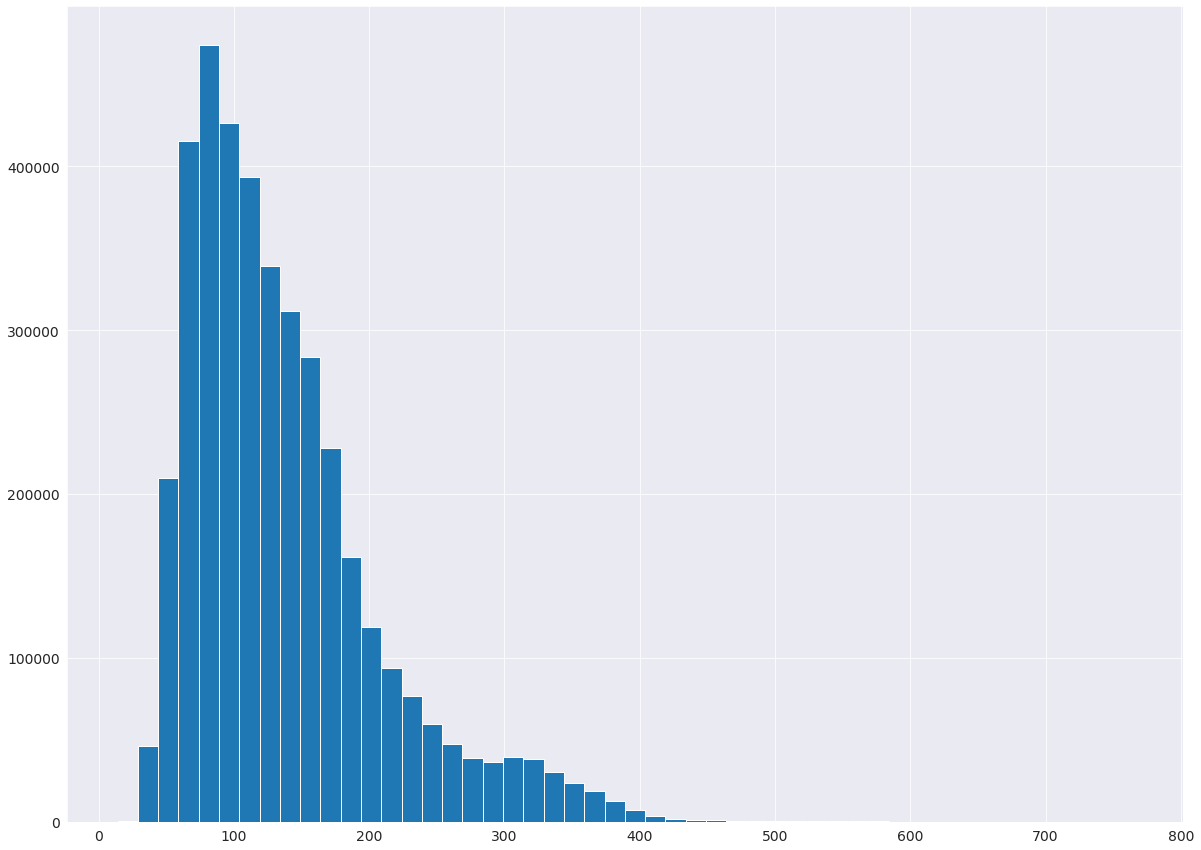

CPU times: user 1.21 s, sys: 35 ms, total: 1.25 s
Wall time: 1.46 s


In [ ]:
%%time
hist_ActualElapsedTime = df[df['ActualElapsedTime']!= 0]
hist_ActualElapsedTime['ActualElapsedTime'].hist(bins=50, figsize=(20,15))
plt.show()

**2. Dask**

CPU times: user 1min 8s, sys: 1.15 s, total: 1min 9s
Wall time: 47.4 s


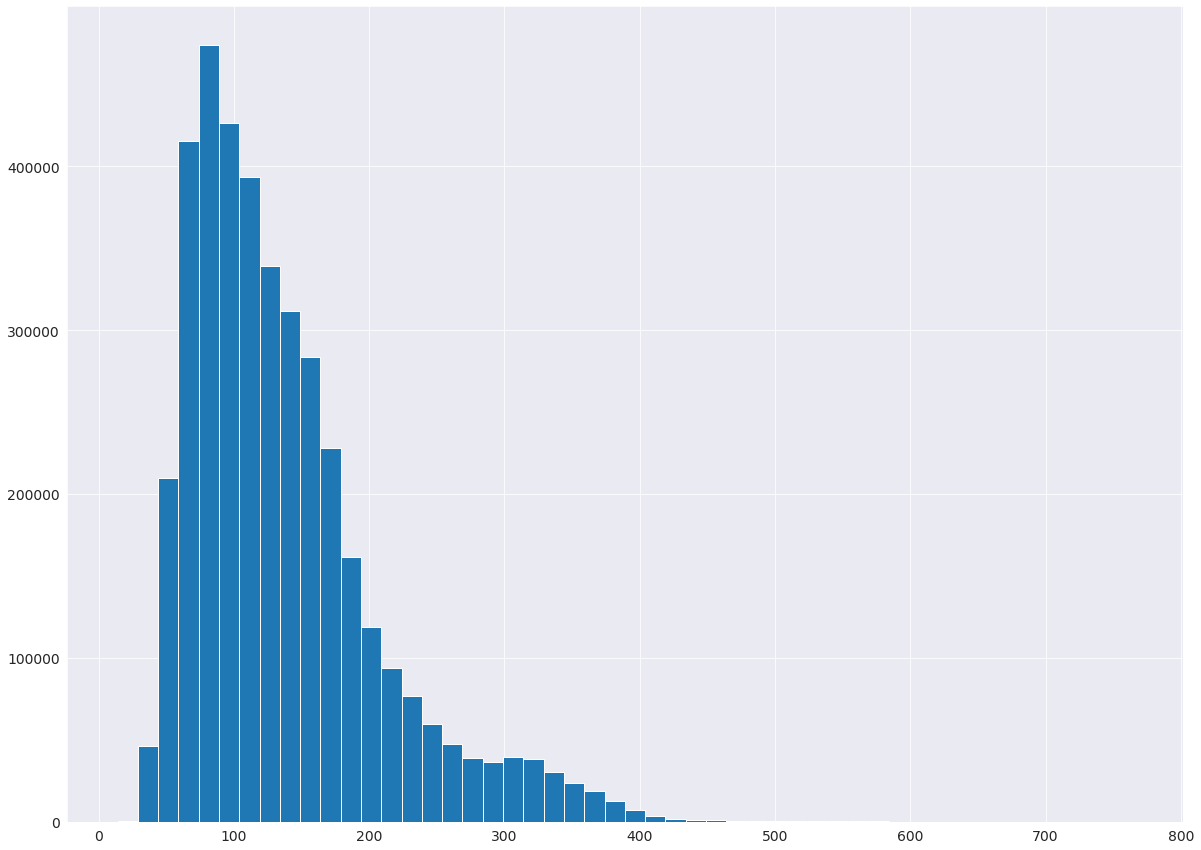

In [ ]:
%%time
dd_hist_ActualElapsedTime = dd_df[dd_df['ActualElapsedTime']!= 0]
dd_hist_ActualElapsedTime['ActualElapsedTime'].compute().hist(bins=50, figsize=(20,15))

**3. Koalas**

In [ ]:
%%time
k_hist_ActualElapsedTime = k_df[k_df['ActualElapsedTime']!= 0]
k_hist_ActualElapsedTime['ActualElapsedTime'].hist(bins=50, figsize=(20,15))

CPU times: user 853 ms, sys: 104 ms, total: 957 ms
Wall time: 1min 59s


**Scatterplot**

Displays the relationship between the 'AirTime' or Flight Time (in Minutes) and 'Distance' variable in the dataset. We can found that there is a positive correlation between 'AirTime' and 'Distance'.

**1. Pandas**

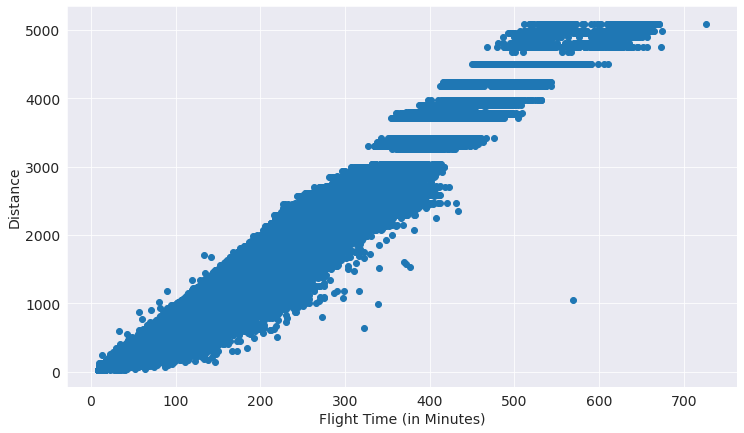

CPU times: user 7.78 s, sys: 38.4 ms, total: 7.81 s
Wall time: 7.81 s


In [ ]:
%%time
time = df[df['AirTime']!= 0]
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(time['AirTime'], time['Distance'])
ax.set_xlabel('Flight Time (in Minutes)')
ax.set_ylabel('Distance')
plt.show()

**2. Dask**

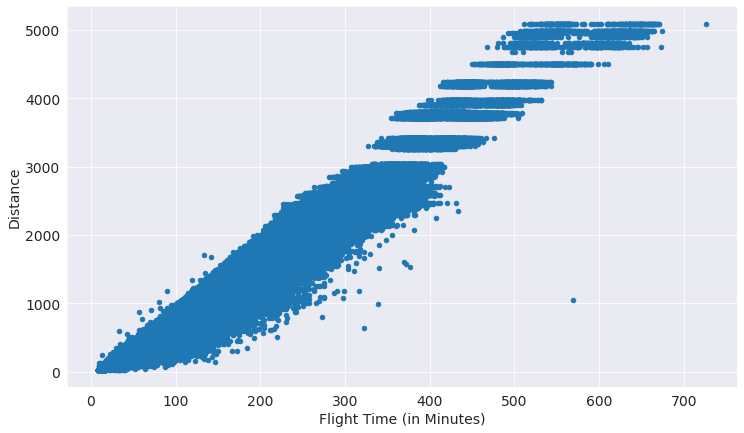

CPU times: user 1min 13s, sys: 1.23 s, total: 1min 15s
Wall time: 52.9 s


In [ ]:
%%time
dd_time = dd_df[dd_df['AirTime']!= 0]
dd_time.compute().plot.scatter(x='AirTime', y='Distance', figsize=(12,7))
plt.xlabel('Flight Time (in Minutes)')
plt.ylabel('Distance')
plt.show()

**3. Koalas**

In [ ]:
%%time
k_time = k_df[k_df['AirTime']!= 0]
k_time.plot.scatter(x='AirTime', y='Distance')

CPU times: user 1.28 s, sys: 165 ms, total: 1.45 s
Wall time: 1min 7s


**Line Chart** 

The line chart displays the average monthly arrival delay time (in minutes). We can see that the 6th Month (June) has the highest average arrival delay time.



**1. Pandas**

In [ ]:
# Group the data by Month and compute average over arrival delay time.
line_data = df.groupby('Month')['ArrDelayMinutes'].mean().reset_index()

In [ ]:
line_data['Month'] = line_data['Month'].replace(['1', '2', '3', '4', '5', '6', '7'], ['January', 'February', 'March', 'April', 'May', 'June', 'July'])

In [ ]:
%%time
import plotly.express as px
import plotly.graph_objects as go

# Create line plot here

# First we create a figure using go
line_plot = go.Figure(data=go.Scatter(x=line_data['Month'], y=line_data['ArrDelayMinutes'], mode='lines', marker=dict(color='red')))
# Updating layout through `update_layout`. Here we are adding title to the plot and providing title to x and y axis.
line_plot.update_layout(title='Average Monthly Arrival Delay Time', xaxis_title='Month', yaxis_title='Average Delay Time (in minutes)')
# Display the figure
line_plot.show()

CPU times: user 9.44 ms, sys: 4.01 ms, total: 13.4 ms
Wall time: 13.1 ms


**2. Dask**

In [ ]:
# Group the data by Month and compute average over arrival delay time.
dd_line_data = dd_df[['Month', 'ArrDelayMinutes']]
dd_line_data = dd_line_data.groupby(['Month'])['ArrDelayMinutes'].mean()

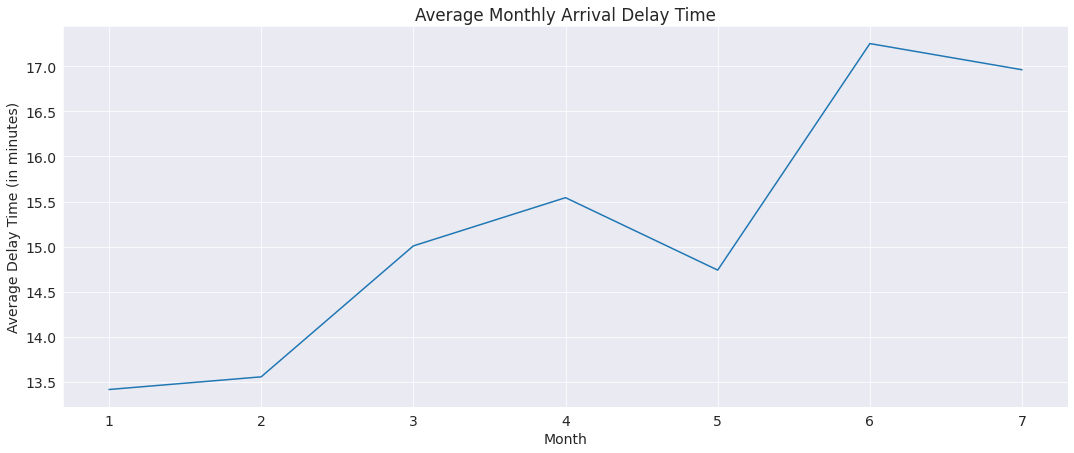

CPU times: user 1min 14s, sys: 1.19 s, total: 1min 15s
Wall time: 51.1 s


In [ ]:
%%time
# Create line plot here
dd_line_data.compute().plot(figsize=(18, 7))
plt.title('Average Monthly Arrival Delay Time')
plt.xlabel('Month')
plt.ylabel('Average Delay Time (in minutes)')

# display the plot
plt.show()

**3. Koalas**

In [ ]:
%%time
# Group the data by Month and compute average over arrival delay time.
k_line_data = k_df[['Month', 'ArrDelayMinutes']]
k_line_data['ArrDelayMinutes'] = k_df['ArrDelayMinutes'].astype('float64')
k_line_data = k_line_data.groupby(['Month'])['ArrDelayMinutes'].mean().sort_index()

CPU times: user 33.6 ms, sys: 5.27 ms, total: 38.8 ms
Wall time: 286 ms


In [ ]:
%%time
# Create line plot here
k_line_data.plot.line()

CPU times: user 827 ms, sys: 82.6 ms, total: 909 ms
Wall time: 1min 57s


**Bar Chart** 

This bar chart provides a visual representation of the data and allows for easy comparison of the number of cancelled flights across different airlines.

**1. Pandas**

In [ ]:
count_Cancel = df.groupby(['Airline'])['Cancelled'].sum()

In [ ]:
cancelled = count_Cancel.sort_values(ascending = False)

CPU times: user 73.7 ms, sys: 0 ns, total: 73.7 ms
Wall time: 77.2 ms


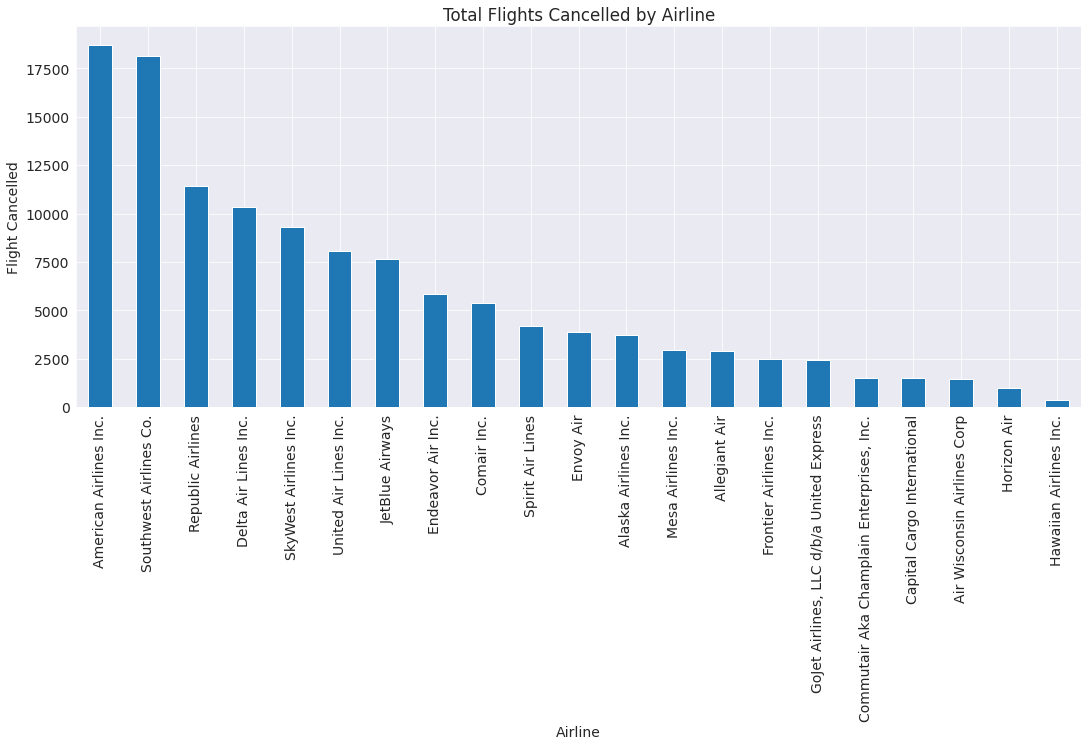

In [ ]:
%%time
cancelled.plot(kind='bar', title='Total Flights Cancelled by Airline',
               ylabel='Flight Cancelled', xlabel='Airline', figsize=(18, 7))

**2. Dask**

In [ ]:
dd_count_Cancel = dd_df.groupby(['Airline'])['Cancelled'].sum().nlargest(21)

CPU times: user 1min 13s, sys: 1.22 s, total: 1min 14s
Wall time: 51 s


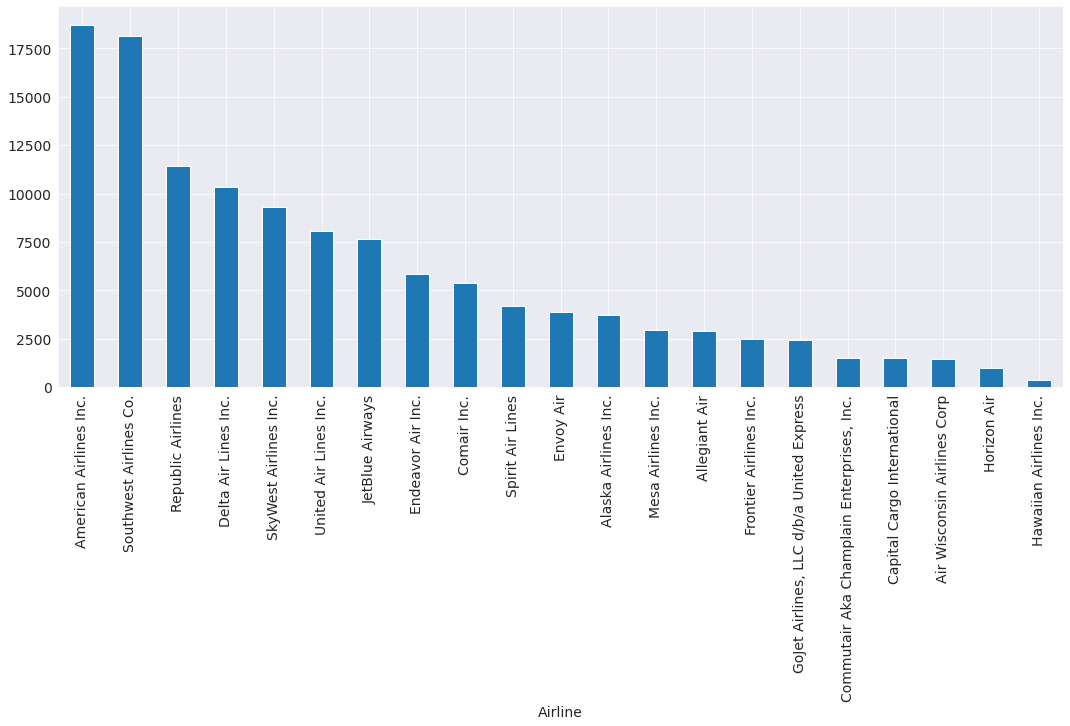

In [ ]:
%%time
dd_count_Cancel.compute().plot.bar(figsize=(18,7))

**3. Koalas**

In [ ]:
k_count_Cancel = k_df[k_df['Cancelled']==True]
k_count_Cancel = k_count_Cancel.groupby(["Airline"]).agg({'Cancelled':'count'})
k_count_Cancel = k_count_Cancel['Cancelled'].nlargest(21)

In [ ]:
%%time
k_count_Cancel.plot.bar()

CPU times: user 284 ms, sys: 30.4 ms, total: 314 ms
Wall time: 29.1 s




> **Short Summary**<br>For Exploratory Analysis and Visualization part, we have show the following informations: <br>1.   Statistic<br>2.   Histogram<br>3. Scatter<br>4. Line Chart<br>5. Bar Chart<br><br> From all of the above tasks, we have observed the performance of Pandas, Dask and Koalas which measure in time. Overall, Pandas will have better performance than Dask and Koalas in term of visualization.



## Asking and Answering Questions




#### **Q1: Which airline has the highest number of flight diversion in 2022?**

**1. Pandas**

In [ ]:
divert = df.groupby("Airline")['Diverted'].sum().sort_values(ascending=False)
divert

Airline
Southwest Airlines Co.                       1515
American Airlines Inc.                       1346
SkyWest Airlines Inc.                        1209
Delta Air Lines Inc.                         1063
United Air Lines Inc.                        1006
JetBlue Airways                               635
Republic Airlines                             603
Comair Inc.                                   398
Envoy Air                                     371
Alaska Airlines Inc.                          353
Endeavor Air Inc.                             318
Spirit Air Lines                              250
Capital Cargo International                   206
Frontier Airlines Inc.                        162
Allegiant Air                                 161
Mesa Airlines Inc.                            157
Commutair Aka Champlain Enterprises, Inc.     134
Horizon Air                                   100
Air Wisconsin Airlines Corp                   100
GoJet Airlines, LLC d/b/a United Express  

CPU times: user 62.4 ms, sys: 71 µs, total: 62.5 ms
Wall time: 67.7 ms


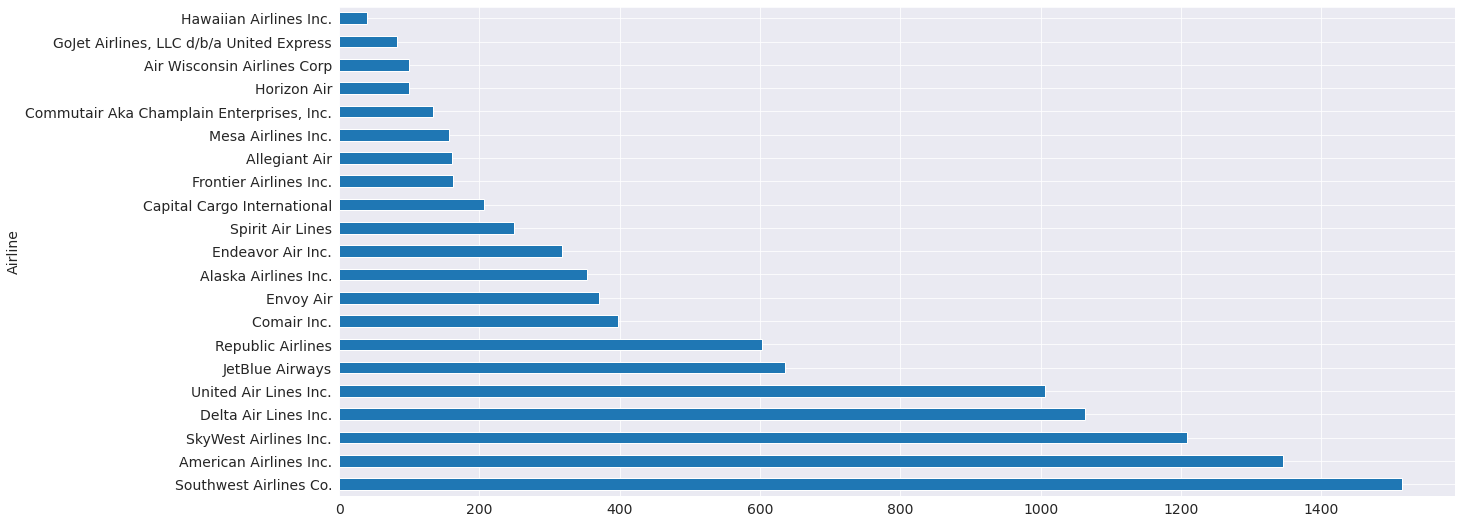

In [ ]:
%%time
plt.figure(figsize=(20, 9))
divert.plot.barh()

**2. Dask**

In [ ]:
dd_divert = dd_df.groupby("Airline")['Diverted'].sum().nlargest(21)
dd_divert.compute()

Airline
Southwest Airlines Co.                       1515
American Airlines Inc.                       1346
SkyWest Airlines Inc.                        1209
Delta Air Lines Inc.                         1063
United Air Lines Inc.                        1006
JetBlue Airways                               635
Republic Airlines                             603
Comair Inc.                                   398
Envoy Air                                     371
Alaska Airlines Inc.                          353
Endeavor Air Inc.                             318
Spirit Air Lines                              250
Capital Cargo International                   206
Frontier Airlines Inc.                        162
Allegiant Air                                 161
Mesa Airlines Inc.                            157
Commutair Aka Champlain Enterprises, Inc.     134
Horizon Air                                   100
Air Wisconsin Airlines Corp                   100
GoJet Airlines, LLC d/b/a United Express  

CPU times: user 1min 12s, sys: 1.19 s, total: 1min 13s
Wall time: 49.9 s


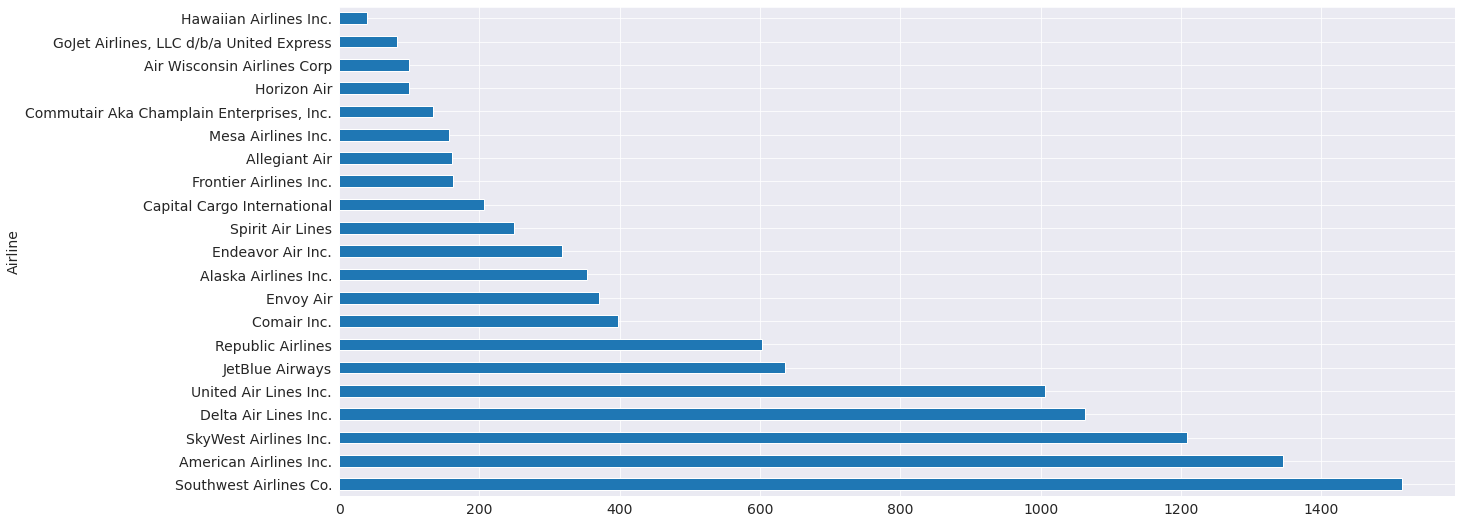

In [ ]:
%%time
plt.figure(figsize=(20, 9))
dd_divert.compute().plot.barh()

**3. Koalas**

In [ ]:
k_divert = k_df[k_df['Diverted']==True]
k_divert = k_divert.groupby(["Airline"]).agg({'Diverted':'count'})
k_divert = k_divert['Diverted'].nlargest(21)
k_divert

Airline
Southwest Airlines Co.                       1515
American Airlines Inc.                       1346
SkyWest Airlines Inc.                        1209
Delta Air Lines Inc.                         1063
United Air Lines Inc.                        1006
JetBlue Airways                               635
Republic Airlines                             603
Comair Inc.                                   398
Envoy Air                                     371
Alaska Airlines Inc.                          353
Endeavor Air Inc.                             318
Spirit Air Lines                              250
Capital Cargo International                   206
Frontier Airlines Inc.                        162
Allegiant Air                                 161
Mesa Airlines Inc.                            157
Commutair Aka Champlain Enterprises, Inc.     134
Horizon Air                                   100
Air Wisconsin Airlines Corp                   100
GoJet Airlines, LLC d/b/a United Express  

In [ ]:
%%time
k_divert.plot.barh()

CPU times: user 285 ms, sys: 26.3 ms, total: 311 ms
Wall time: 26.9 s


><b>Answer :</b> For the first question, we want to determine which airline have the most flight diversion. First we count the amount of flight diversion using the 'Diverted' column and then we use groupby function and data aggregation function to group up the values with the 'Airline' column. Then, we visualize it using bar chart and proves that Southwest Airline Co. has the most flight diversion (1515 flights) while Hawaiian Airline Inc. has the least flight diversion (40 flights) compared to other airlines.



#### **Q2: Which Destination have the most flight?**

**1. Pandas**

ATL    183671
ORD    172191
DFW    161215
DEN    158095
CLT    126099
Name: Dest, dtype: int64


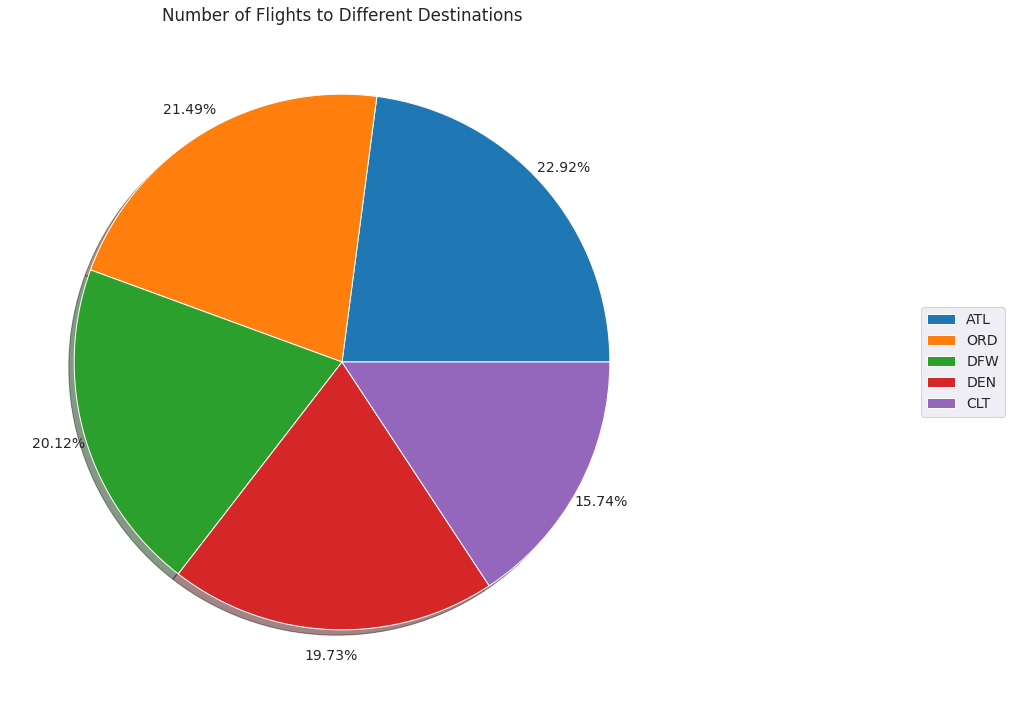

CPU times: user 279 ms, sys: 4 ms, total: 283 ms
Wall time: 300 ms


In [ ]:
%%time
# Count the number of flights to each destination
destination_counts = df['Dest'].value_counts().nlargest(5)
print(destination_counts)

# Create a pie chart of the destination counts
plt.rcParams['figure.figsize'] = (12, 13)
plt.pie(destination_counts, shadow = True, autopct = '%.2f%%', pctdistance=1.1)
plt.title('Number of Flights to Different Destinations')
plt.legend(destination_counts.index, loc='right', bbox_to_anchor=(1.5,0.5))
plt.show()

**2. Dask**

ATL    183671
ORD    172191
DFW    161215
DEN    158095
CLT    126099
Name: Dest, dtype: int64


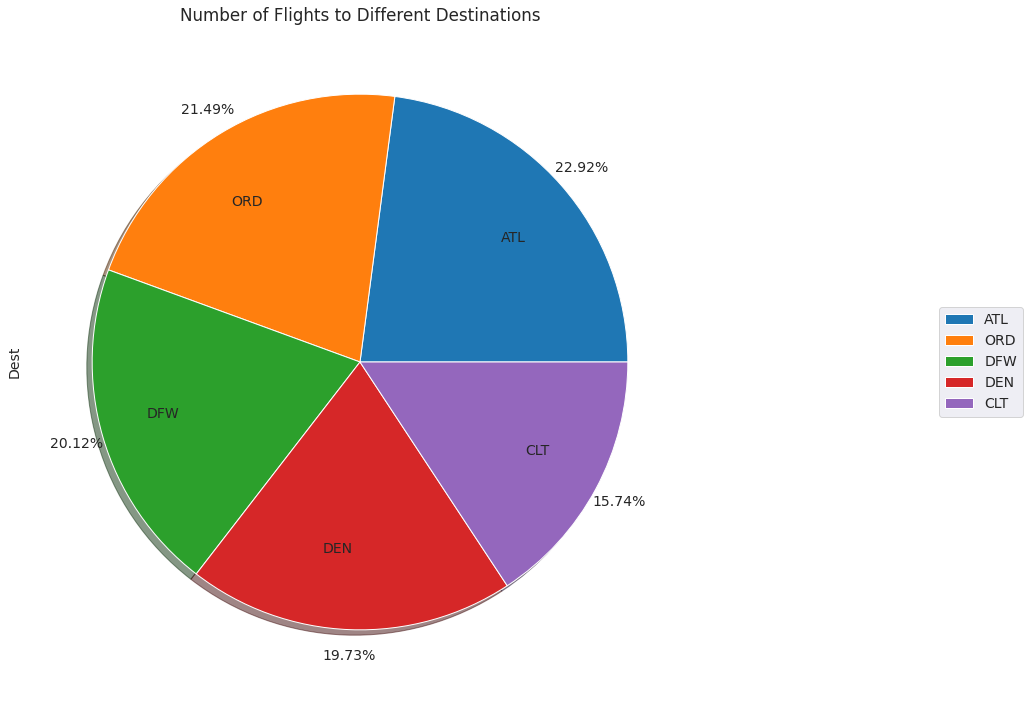

CPU times: user 4min 37s, sys: 4.54 s, total: 4min 42s
Wall time: 3min 12s


In [ ]:
%%time
# Count the number of flights to each destination using dask
dd_destination_counts = dd_df['Dest'].value_counts().nlargest(5)
print(dd_destination_counts.compute())

# Create a pie chart of the destination counts
dd_destination_counts.compute().plot.pie(shadow = True, autopct = '%.2f%%', pctdistance=1.1, labeldistance=0.7)
plt.legend(dd_destination_counts.index, loc='right', bbox_to_anchor=(1.5,0.5))
plt.title('Number of Flights to Different Destinations')
plt.show()

**3. Koalas**

In [ ]:
%%time
# Count the number of flights to each destination using koalas
k_destination_counts = k_df.groupby(["Dest"]).agg({'Diverted':'count'})
k_destination_counts = k_destination_counts['Diverted'].nlargest(5)
print(k_destination_counts)
# Create a pie chart of the destination counts
k_destination_counts.plot.pie(title='Number of Flights to Different Destinations')

Dest
ATL    183671
ORD    172191
DFW    161215
DEN    158095
CLT    126099
Name: Diverted, dtype: int64
CPU times: user 1.02 s, sys: 103 ms, total: 1.13 s
Wall time: 2min 20s




> <b>Answer :</b> As for this question, we want to calculate which destination have the most flight. We simply use the count function to calculate the sum for each destination from the 'Dest' column and the we visualize the values using bar chart. It shows that Atlanta has the most flight with 22.9% of the flights followed by Dallas/Fort Worth with 20.1%.



#### **Q3: Which airline travel the farthest?**

**1. Pandas**

In [ ]:
# group the data by flight and calculate the maximum distance
flight_distances = df.groupby('Airline')['Distance'].max().sort_values(ascending=False)
flight_distances

Airline
Hawaiian Airlines Inc.                       5095.0
United Air Lines Inc.                        4962.0
American Airlines Inc.                       4678.0
Delta Air Lines Inc.                         4502.0
Southwest Airlines Co.                       2979.0
Alaska Airlines Inc.                         2874.0
JetBlue Airways                              2717.0
Spirit Air Lines                             2511.0
Frontier Airlines Inc.                       2176.0
Allegiant Air                                2034.0
Mesa Airlines Inc.                           1773.0
SkyWest Airlines Inc.                        1770.0
Horizon Air                                  1739.0
Republic Airlines                            1569.0
Envoy Air                                    1510.0
Comair Inc.                                  1325.0
Endeavor Air Inc.                            1162.0
GoJet Airlines, LLC d/b/a United Express      900.0
Air Wisconsin Airlines Corp                   900.0
Comm

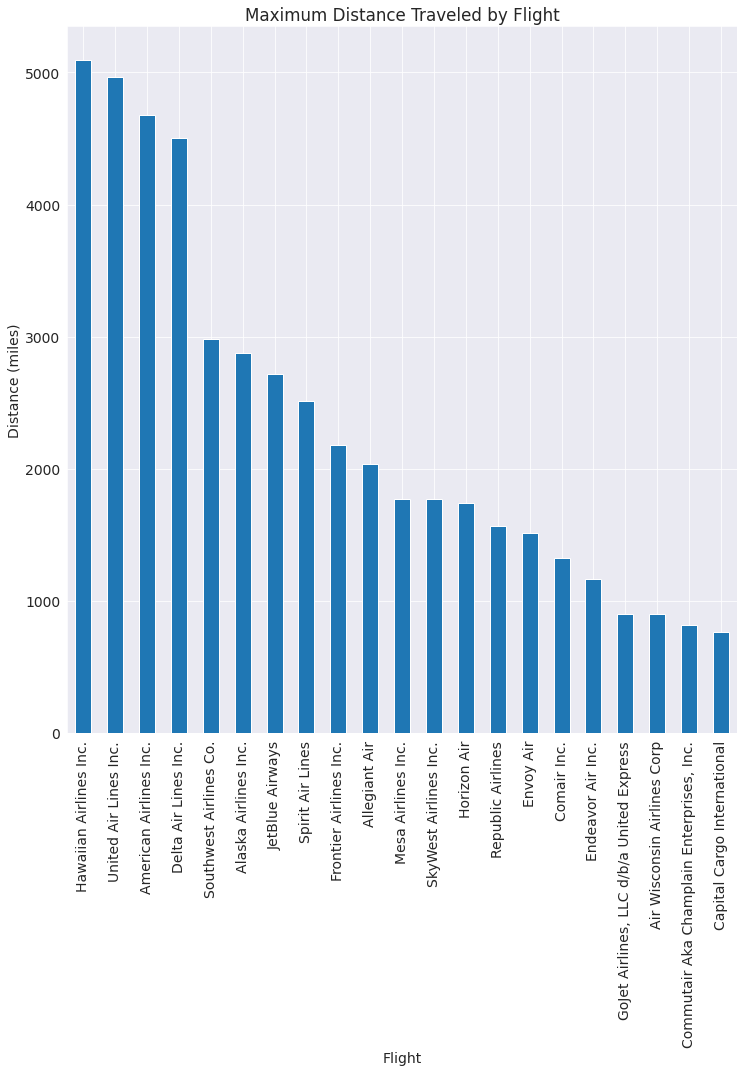

CPU times: user 425 ms, sys: 12.1 ms, total: 437 ms
Wall time: 442 ms


In [ ]:
%%time
# create a bar plot of the flight distances
flight_distances.plot(kind='bar')

# add a title and labels to the plot
plt.title('Maximum Distance Traveled by Flight')
plt.xlabel('Flight')
plt.ylabel('Distance (miles)')

# display the plot
plt.show()

**2. Dask**

In [ ]:
# group the data by flight and calculate the maximum distance
dd_flight_distances = dd_df.groupby('Airline')['Distance'].max().nlargest(21).compute()
dd_flight_distances

Airline
Hawaiian Airlines Inc.                       5095.0
United Air Lines Inc.                        4962.0
American Airlines Inc.                       4678.0
Delta Air Lines Inc.                         4502.0
Southwest Airlines Co.                       2979.0
Alaska Airlines Inc.                         2874.0
JetBlue Airways                              2717.0
Spirit Air Lines                             2511.0
Frontier Airlines Inc.                       2176.0
Allegiant Air                                2034.0
Mesa Airlines Inc.                           1773.0
SkyWest Airlines Inc.                        1770.0
Horizon Air                                  1739.0
Republic Airlines                            1569.0
Envoy Air                                    1510.0
Comair Inc.                                  1325.0
Endeavor Air Inc.                            1162.0
Air Wisconsin Airlines Corp                   900.0
GoJet Airlines, LLC d/b/a United Express      900.0
Comm

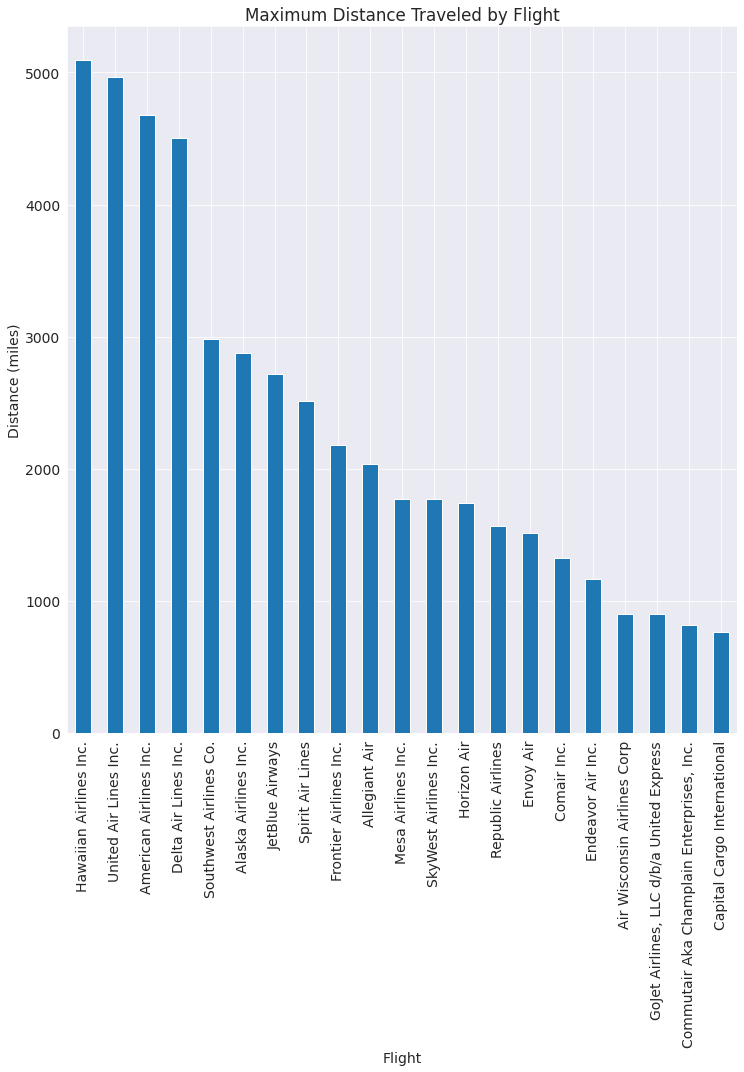

CPU times: user 410 ms, sys: 11 ms, total: 421 ms
Wall time: 430 ms


In [ ]:
%%time
# create a bar plot of the flight distances
dd_flight_distances.plot(kind='bar')

# add a title and labels to the plot
plt.title('Maximum Distance Traveled by Flight')
plt.xlabel('Flight')
plt.ylabel('Distance (miles)')

# display the plot
plt.show()

**3. Koalas**

In [ ]:
# group the data by flight and calculate the maximum distance
k_flight_distances = k_df.groupby('Airline')['Distance'].max().nlargest(21)
k_flight_distances

Airline
Hawaiian Airlines Inc.                       5095.0
United Air Lines Inc.                        4962.0
American Airlines Inc.                       4678.0
Delta Air Lines Inc.                         4502.0
Southwest Airlines Co.                       2979.0
Alaska Airlines Inc.                         2874.0
JetBlue Airways                              2717.0
Spirit Air Lines                             2511.0
Frontier Airlines Inc.                       2176.0
Allegiant Air                                2034.0
Mesa Airlines Inc.                           1773.0
SkyWest Airlines Inc.                        1770.0
Horizon Air                                  1739.0
Republic Airlines                            1569.0
Envoy Air                                    1510.0
Comair Inc.                                  1325.0
Endeavor Air Inc.                            1162.0
GoJet Airlines, LLC d/b/a United Express      900.0
Air Wisconsin Airlines Corp                   900.0
Comm

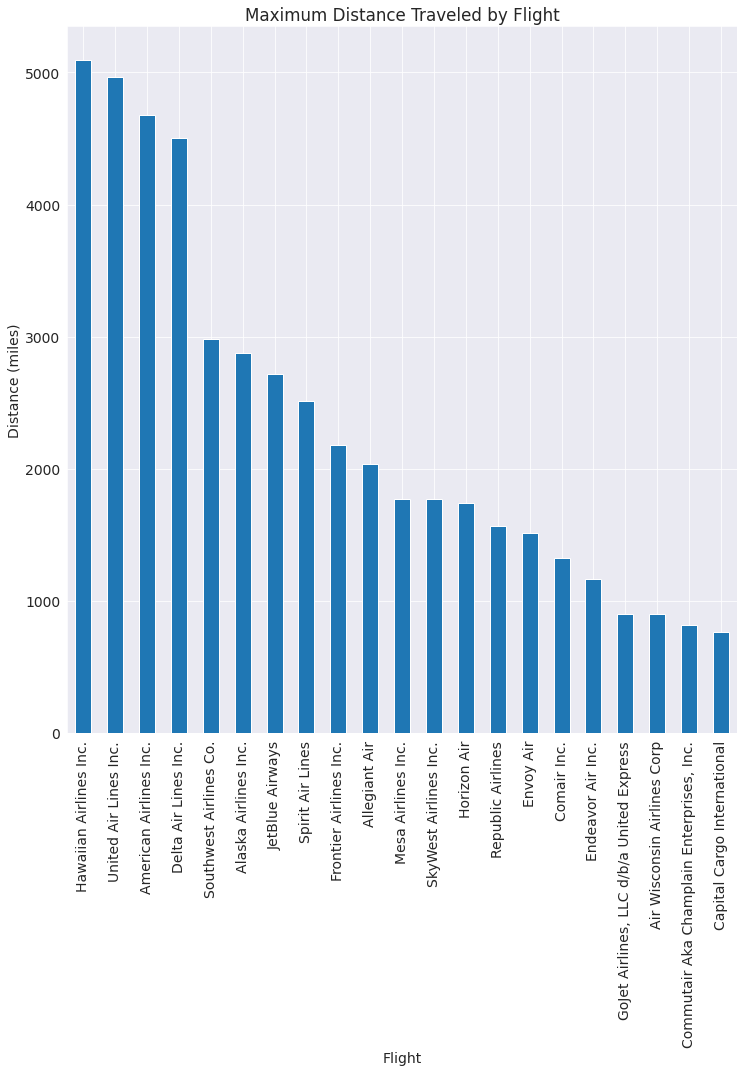

CPU times: user 901 ms, sys: 62.4 ms, total: 963 ms
Wall time: 59.6 s


In [ ]:
%%time
# convert the Koalas DataFrame to a Pandas DataFrame
p_df = k_flight_distances.to_pandas()

# create a bar plot of the flight distances
p_df.plot(kind='bar')

# add a title and labels to the plot
plt.title('Maximum Distance Traveled by Flight')
plt.xlabel('Flight')
plt.ylabel('Distance (miles)')

# display the plot
plt.show()



> <b>Answer :</b> In this question, we wanted to find which airline travel the farthest. So we calculate the sum of the distance travelled by each airline using the '' column and then we use groupby and data aggregation function to group the values with the 'Airline' column. We use barchart to visualize the distance travelled by each airline. The bar chart proves that Hawaiian Airline Inc. travelled 5095 miles which is the farthest and the least airline which is Capital Cargo International travelled only for 764 miles.



#### **Q4: Which month has the most flight?**

**1. Pandas**

month
1    563735
2    519952
3    590542
4    580290
5    602950
6    602057
7    618790
Name: FlightDate, dtype: int64


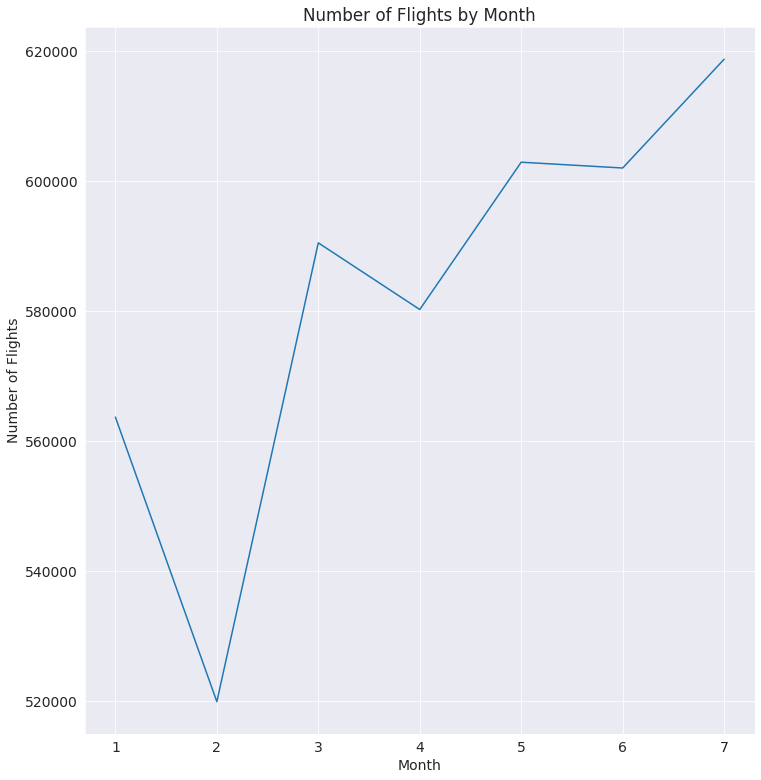

CPU times: user 771 ms, sys: 8.04 ms, total: 779 ms
Wall time: 796 ms


In [ ]:
%%time
# extract the month from the date column
df['month'] = pd.DatetimeIndex(df['FlightDate']).month

# group the data by month
flights_by_month = df.groupby('month')['FlightDate'].count()
print(flights_by_month)

# create a line plot of the number of flights per month
flights_by_month.plot(kind='line')

# add a title and labels to the plot
plt.title('Number of Flights by Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')

# display the plot
plt.show()

**2. Dask**

Month
1    563735
2    519952
3    590542
4    580290
5    602950
6    602057
7    618790
Name: FlightDate, dtype: int64


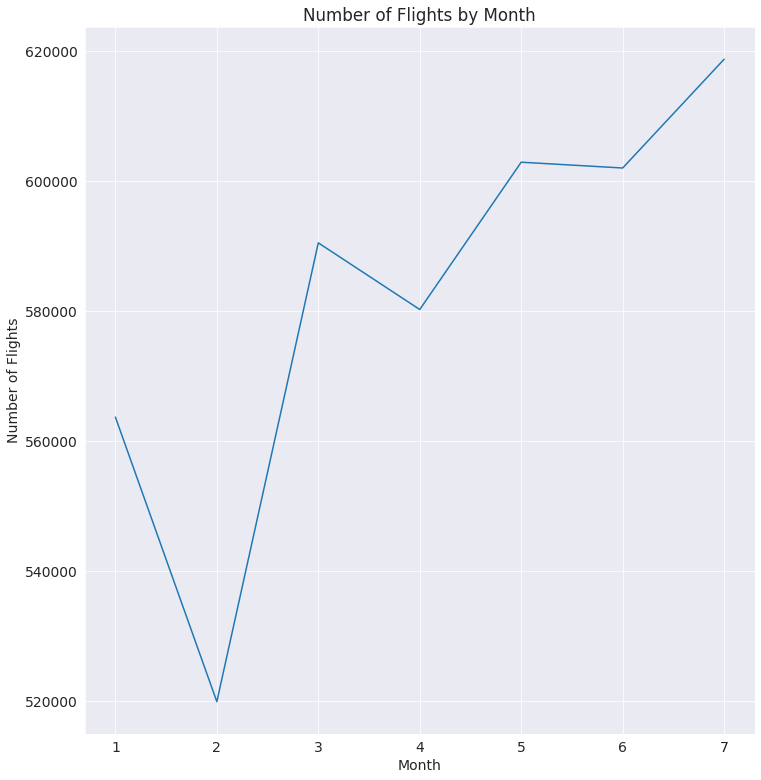

CPU times: user 1min 9s, sys: 1.19 s, total: 1min 11s
Wall time: 49.8 s


In [ ]:
%%time
# group the data by month
dd_flights_by_month = dd_df.groupby('Month')['FlightDate'].count().compute()
print(dd_flights_by_month)

# create a line plot of the number of flights per month
dd_flights_by_month.plot(kind='line')

# add a title and labels to the plot
plt.title('Number of Flights by Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')

# display the plot
plt.show()

**3. Koalas**

In [ ]:
%%time
# group the data by month
k_flights_by_month = k_df.groupby('Month')['FlightDate'].count().sort_index()
print(k_flights_by_month)

# create a line plot of the number of flights per month
k_flights_by_month.plot.line()

Month
1    563735
2    519952
3    590542
4    580290
5    602950
6    602057
7    618790
Name: FlightDate, dtype: int64
CPU times: user 1.2 s, sys: 127 ms, total: 1.32 s
Wall time: 2min 52s


> <b>Answer :</b> 

> For this question, we wanted to find out which airline has the most flights. We started by extracting the month from the "FlightDate" column in the "df" dataframe, and creates a new column called "month". After that, we group the data in "df" by the "month" column, and counts the number of flights for each month. Finally, we printed the result of the grouped and counted data, which is a series with the count of flights for each month. After creating the line chart, we can see that the month with the most flights is the 7th month which is July with 618,790 flights.











#### **Q5: Which airline has the most cancelled flights?**

**1. Pandas**

In [ ]:
%%time
cancelled_df = df.groupby("Airline")['Cancelled'].sum().sort_values(ascending=False)
cancelled_df

CPU times: user 64.4 ms, sys: 0 ns, total: 64.4 ms
Wall time: 75.4 ms


Airline
American Airlines Inc.                       18736
Southwest Airlines Co.                       18164
Republic Airlines                            11435
Delta Air Lines Inc.                         10341
SkyWest Airlines Inc.                         9286
United Air Lines Inc.                         8074
JetBlue Airways                               7631
Endeavor Air Inc.                             5819
Comair Inc.                                   5351
Spirit Air Lines                              4198
Envoy Air                                     3891
Alaska Airlines Inc.                          3738
Mesa Airlines Inc.                            2956
Allegiant Air                                 2891
Frontier Airlines Inc.                        2501
GoJet Airlines, LLC d/b/a United Express      2422
Commutair Aka Champlain Enterprises, Inc.     1518
Capital Cargo International                   1481
Air Wisconsin Airlines Corp                   1426
Horizon Air            

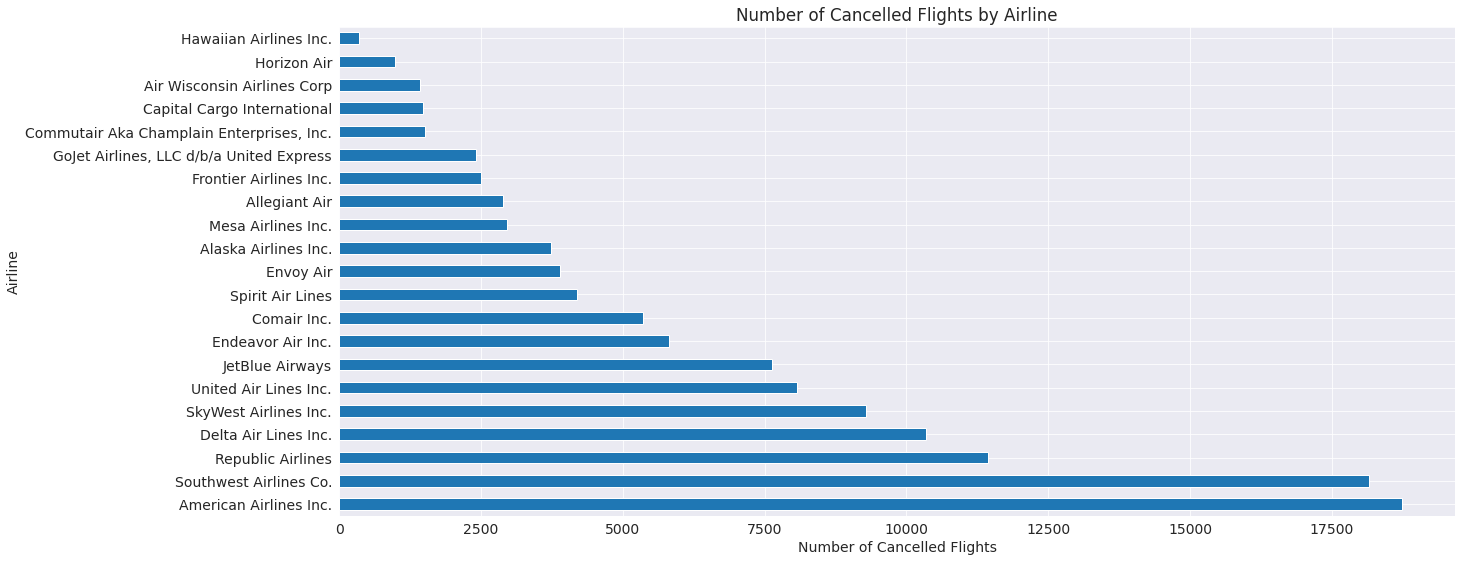

CPU times: user 438 ms, sys: 13.9 ms, total: 452 ms
Wall time: 461 ms


In [ ]:
%%time
plt.figure(figsize=(20, 9))
cancelled_df.plot(kind='barh')
plt.xlabel('Number of Cancelled Flights')
plt.ylabel('Airline')
plt.title('Number of Cancelled Flights by Airline')

plt.show()

**2. Dask**

In [ ]:
%%time
cancelled_dd = dd_df.groupby("Airline")['Cancelled'].sum().nlargest(21)
cancelled_dd.compute()

CPU times: user 1min 8s, sys: 1.15 s, total: 1min 9s
Wall time: 48.3 s


Airline
American Airlines Inc.                       18736
Southwest Airlines Co.                       18164
Republic Airlines                            11435
Delta Air Lines Inc.                         10341
SkyWest Airlines Inc.                         9286
United Air Lines Inc.                         8074
JetBlue Airways                               7631
Endeavor Air Inc.                             5819
Comair Inc.                                   5351
Spirit Air Lines                              4198
Envoy Air                                     3891
Alaska Airlines Inc.                          3738
Mesa Airlines Inc.                            2956
Allegiant Air                                 2891
Frontier Airlines Inc.                        2501
GoJet Airlines, LLC d/b/a United Express      2422
Commutair Aka Champlain Enterprises, Inc.     1518
Capital Cargo International                   1481
Air Wisconsin Airlines Corp                   1426
Horizon Air            

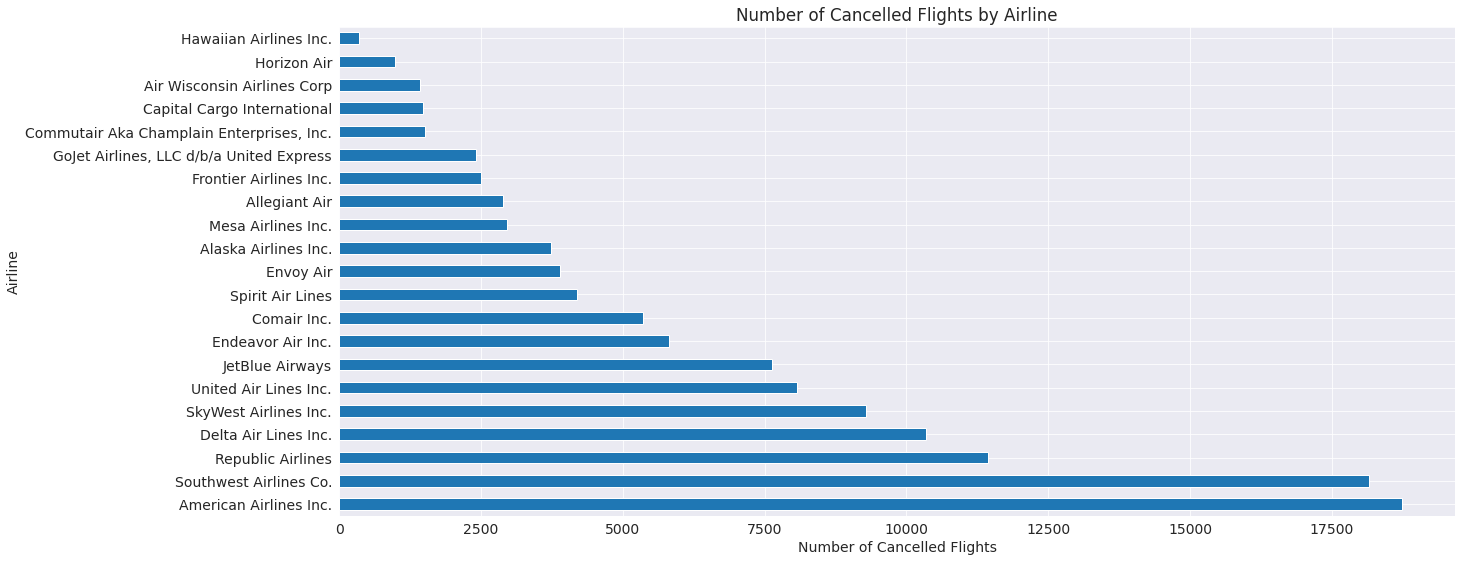

CPU times: user 1min 10s, sys: 1.17 s, total: 1min 11s
Wall time: 50.6 s


In [ ]:
%%time
plt.figure(figsize=(20, 9))
cancelled_dd.compute().plot.barh()
plt.xlabel('Number of Cancelled Flights')
plt.ylabel('Airline')
plt.title('Number of Cancelled Flights by Airline')
plt.show()

**3. Koalas**

In [ ]:
%%time
cancelled_ks = k_df[k_df['Cancelled']==True]
cancelled_ks = cancelled_ks.groupby(["Airline"]).agg({'Cancelled':'count'})
cancelled_ks = cancelled_ks['Cancelled'].nlargest(21)
cancelled_ks

CPU times: user 64.8 ms, sys: 9.21 ms, total: 74 ms
Wall time: 523 ms


Airline
American Airlines Inc.                       18736
Southwest Airlines Co.                       18164
Republic Airlines                            11435
Delta Air Lines Inc.                         10341
SkyWest Airlines Inc.                         9286
United Air Lines Inc.                         8074
JetBlue Airways                               7631
Endeavor Air Inc.                             5819
Comair Inc.                                   5351
Spirit Air Lines                              4198
Envoy Air                                     3891
Alaska Airlines Inc.                          3738
Mesa Airlines Inc.                            2956
Allegiant Air                                 2891
Frontier Airlines Inc.                        2501
GoJet Airlines, LLC d/b/a United Express      2422
Commutair Aka Champlain Enterprises, Inc.     1518
Capital Cargo International                   1481
Air Wisconsin Airlines Corp                   1426
Horizon Air            

In [ ]:
%%time
import plotly.graph_objects as go

fig = cancelled_ks.plot.barh()
fig.update_layout(title_text='Number of Cancelled Flights by Airline',xaxis_title='Number of Cancelled Flights', yaxis_title='Airline')
fig.show()


CPU times: user 267 ms, sys: 18.2 ms, total: 286 ms
Wall time: 26.7 s




> **Answer :**

> Finally for this question, we wanted to find out the airline with the most cancelled flights. To do this, we used summed the column "Cancelled". This works because the "True" value for bool datatype has a value of 1. Then we grouped the summed values by the "Airline" column then sorted the values by descending order so that the airline with the most cancellations appears on the top of the dataframe/table as well as in the bar charts. Based on the tables and graphs above, we can clearly see that the airline with the most cancelled flights is American Airlines Inc. with a whopping 18,736 cancelled flights.


## Inferences and Conclusion


Pandas, Dask and Koalas are all popular data manipulation libraries in Python. However, they differ in their approach to handling big datasets.<br><br>

**Pandas** is a powerful library for working with structured data, but it can be slow when dealing with very large datasets. It is designed to work in memory and loads the entire dataset into memory before processing it. Pandas is widely considered the most user-friendly of the three libraries. It has a simple and intuitive interface, and provides a lot of convenience functions for working with structured data. The syntax is also straightforward and easy to learn, making it a popular choice for data analysis and manipulation tasks.<br><br>

**Dask**, on the other hand, is designed specifically to handle large datasets that can't fit into memory. It operates on larger datasets by breaking them down into smaller chunks, called "Dask DataFrames", and processing them in parallel. This makes Dask so much faster in processing big datasets than Pandas. While Dask is still user-friendly, this library is more geared towards developers and individuals with a strong programming background. Its parallel processing makes it more complex to set up and manage, especially for those new to distributed computing.<br><br>

**Koalas** is a library that aims to bring the simplicity of working with Pandas DataFrame to the distributed computing power Dask. It is built on top of Dask and provides a Pandas-like interface to work with big datasets, but slower than Dask as it adds an extra layer of abstraction. Koalas is known to provide the ease of use of Pandas with the performance of Pandas. However, with merging the functionality of the two libraries (Pandas and Dask), Koalas can be more complicated to work with.<br><br>

In conclusion, Dask is the fastest choice if you're working with large datasets. In comparison to Dask and Pandas, it is believed that Dask is 500% times faster than Pandas. Koalas are a good alternative to Pandas if you prefer their simplicity and use, but with a small performance penalty. In general, Dask is faster than Koalas as it operates directly on the data and does not have the overhead of the Pandas-like interface.<br><br>

To put it in simpler words for the performance comparison between the libraries:

> **Dask > Koalas > Pandas**





---

### **Reasons to choose Pandas:**
1. Pandas is the most straightforward and easy-to-library when working with structured data in-memory.
2. Has a large community and plenty of learning documentations. You will find it easy to learn new techniques & find solution to problems.
3. You will be provided with ample of convenient functions that will ease your journey in cleaning, transforming and aggregating data.
4. Great for prototyping and exploratory data analysis.


### **Reasons to choose Dask:**
1. Designed specifically for handling big datasets that can't fit into memory.
2. Equipped with parallel processing capabilities, makes it faster than Pandas for large datasets.
3. Good for use in distributed computing environments such as cloud computing.
4. Suitable for use in high-performance and scientific computing.


### **Reasons to choose Koalas:**
1. Provides a Pandas-like interface to work with big datasets.
2. Combines the simplicity and ease of use of Pandas with the performance of Dask.
3. Good for use in a distributed computing environment, but with less complexity than using Dask directly.

## References and Future Work

Future investigation about the air flight dataset and some resources that help to complete this assignment.

From this dataset, we have understood the attribute in the air flight dataset. We can manipulate the data in order to know the factor influencing the air flight and the relationship between various attributes. However, there are also many columns that have not been explored in this project. Therefore, we wish to investigate and understand more about the air flight by getting more insight from this dataset.

**Resources**<br>
[data_analysis_pandas_spark_koalas](https://github.com/techsparksguru/data_analysis_pandas_spark_koalas/blob/master/class10_koalas/koalas.ipynb)<br>
[Koalas User Guide](https://koalas.readthedocs.io/en/latest/index.html)<br>
[Dask Documentation](https://docs.dask.org/en/stable/dataframe-api.html)
